The ipython notebook environment is a superb environment for empirical research.  Sometimes, though, you would like to access the capabilities of other software.  This post shows how to incorporate R and Matlab into ipython notebooks.

<!--TEASER_END-->

In [1]:
%matplotlib inline
%load_ext rmagic 
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.MATLAB started and connected!


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = pd.DataFrame(np.random.rand(100,2),columns=['x','y'])
data.head()

x         y
0  0.376486  0.383480
1  0.717613  0.810156
2  0.158627  0.334782
3  0.899574  0.005522
4  0.092767  0.055730

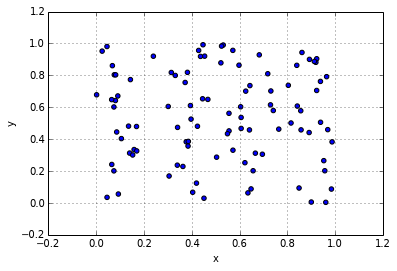

In [3]:
# plot the data in a x,y scatter
data.plot(kind='scatter', x='x', y='y')

In [4]:
# run a regression model
results = pd.ols(y=data['y'], x=data[['x']])
results


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         100
Number of Degrees of Freedom:   2

R-squared:         0.0002
Adj R-squared:    -0.0100

Rmse:              0.2858

F-stat (1, 98):     0.0172, p-value:     0.8960

Degrees of Freedom: model 1, resid 98

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0126     0.0961      -0.13     0.8960    -0.2009     0.1758
     intercept     0.5508     0.0567       9.71     0.0000     0.4397     0.6619
---------------------------------End of Summary---------------------------------

#Running the same analysis and plot in R and viewing in the Ipython Notebook

In [5]:
# push x,y to R
x=data.x
y=data.y
%Rpush x y

In [6]:
%%R
fit <- lm(y ~ x)  # Least-squares regression
summary(fit)  # Display the coefficients of the fit.


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5351 -0.2245  0.0055  0.2533  0.4468 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5508     0.0567   9.715 5.04e-16 ***
x            -0.0126     0.0961  -0.131    0.896    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2858 on 98 degrees of freedom
Multiple R-squared:  0.0001753,	Adjusted R-squared:  -0.01003 
F-statistic: 0.01719 on 1 and 98 DF,  p-value: 0.896



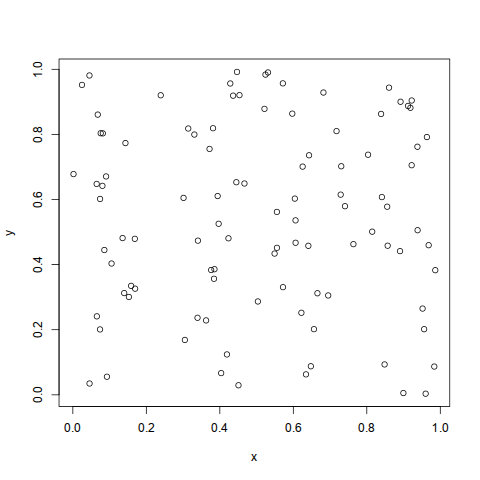

In [7]:
%%R
plot(x,y)  # Plot the data points.

To accomplish this, we needed to install the "R magic" python package called **rmagic**.  There is a similar package for matlab called **python-matlab-bridge** which has a magic called **pymatbridge**.

#Running the same analysis in Matlab and viewing in the Ipython Notebook

In [8]:
#pymatbridge requires x,y to be lists for passing:
x = data.x.values.tolist()
y = data.y.values.tolist()

ans =
    0.5508
   -0.0126


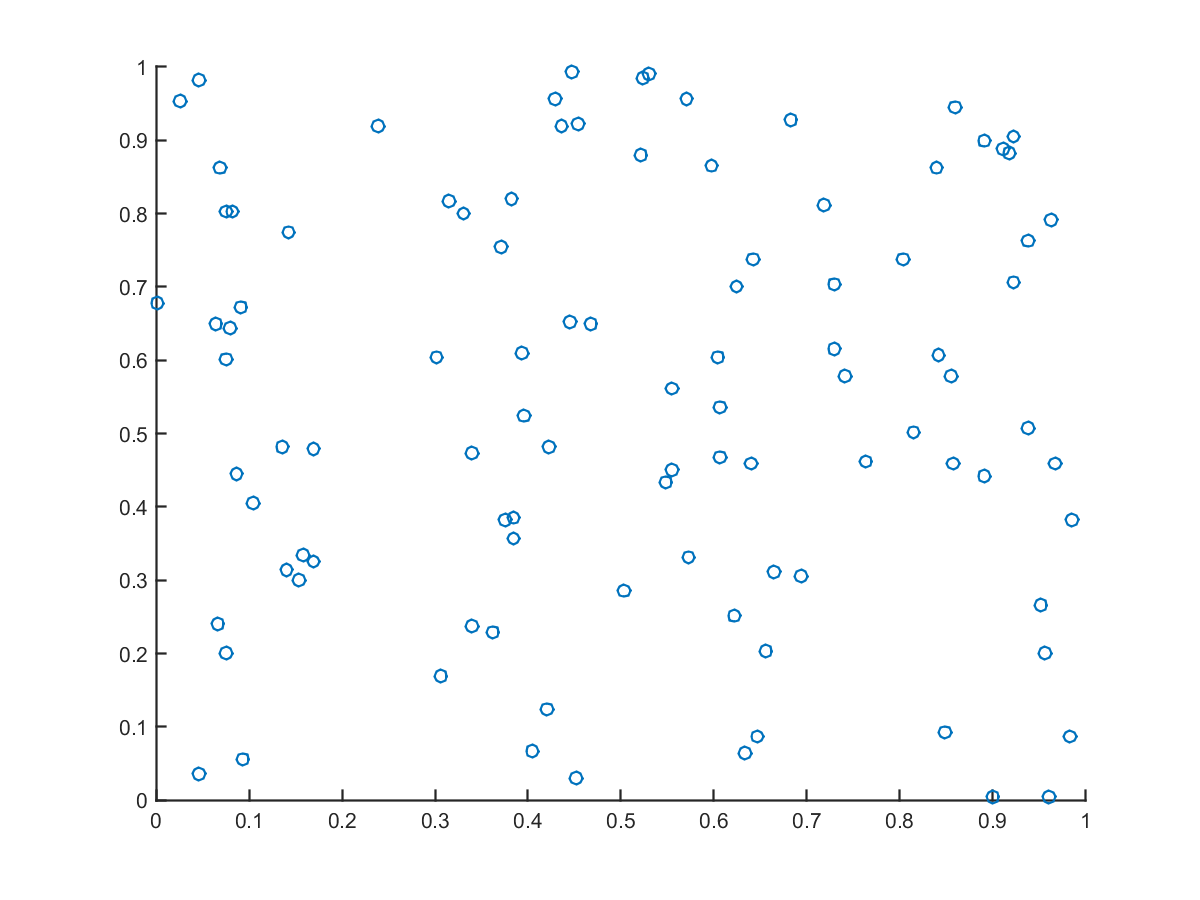

In [9]:
%%matlab -i x,y
x = horzcat(ones(rows(x'),1),x');
y=y';                 
ols(y,x)
scatter(x(:,2),y)